<a href="https://colab.research.google.com/github/danielamador12/public-projects/blob/master/desafio_lambda3_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio - Vaga para Cientista de Dados

![img](https://secure.meetupstatic.com/photos/event/b/3/9/0/600_465405968.jpeg)

## Conhecendo o desafio

**Empresa**: Lambda3 (https://www.lambda3.com.br/)

**Complexidade**: Intermediário

**Tarefa avaliada**: Machine Learning - Classificação

**Requisitos**: 
- Ferramentas Essenciais.
- Conceitos e Aplicações.
- Dominando o Python
- Python para Análise de Dados.
- Machine Learning
    - Algoritmos de Classificação
    - Técnicas de Validação
    - Tunning de Modelos

**Objetivo**: Este desafio tem como objetivo avaliar as habilidades do candidato em relação a uma tarefa simples de classificação, conforme descrito pela empresa.

**Recursos**: Para este desafio é proposto o dataset Iris e poder ser visualizado [aqui](https://archive.ics.uci.edu/ml/datasets/Iris).

Você pode ver o trabalho em cima dessa mesma base de dados com alguns dos algoritmos de Machine Learning aqui utilizados em nosso [portfólio](https://github.com/danielamador12/Portfolio) na parte **Conhecendo Algoritmos**.

<p><span style="color:red">O dataset deve ser o Iris, obrigatoriamente.</span></p>

**Importando as bibliotecas necessárias**

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB
from google.colab import drive

**Importando o dataset Iris**

Estamos importando a base de dados diretamente da API da scikit learn, contudo não há diferença se você tive o arquivo em `.csv`.

Vamos transformar em `DataFrame`, porém antes vamos visualizar os atributos gerais dos dados advindos da biblioteca.

In [2]:
iris = load_iris()

**Visualizando os dados**

Somente as features, logo, sem a classe.


In [3]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

**Visualizando somente os dados da classe**

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Verificando os dados e atributos da base de dados.**


| **0** | **1** | **2** |
|:-----:|:-----:|:-----:|
|setosa|versicolor|virginica|


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**Esses são os nomes das features e essa é a ordem**

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

**Vamos transformar em DataFrame**

Aqui é simples, seja trabalhando em *Python* ou em *R*, DataFrame é o nosso principal local de trabalho e é, sem dúvida, onde sabemos trabalhar melhor, então a transformação dos dados em DataFrame é para podermos utilizar todo esse poder que já temos.


In [7]:
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df['class']=iris.target
iris_df
iris=iris_df.copy()
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Pronto!**

Agora sem dúvida estamos no ambiente ideal para trabalhar. 

Os dados da base Iris não precisam de pré-processamentos, pois são uma base de dados muito simplista e, ao final, bem fácil de se trabalhar.

Vamos chegar a base.

**Informações sobre as colunas**

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


<p><span style="color:red"> Receber as entradas específicas (escolher as variáveis pertinentes).</span></p>
<p><span style="color:red"> Justificar a escolha das variáveis.</span></p>


**Separando separando os atributos que serão utilizados como features e a classe.**

In [9]:
X = iris.drop("class",axis=1)

In [10]:
y = iris["class"]

**Verificando as formas das variáveis.**

In [11]:
X.shape

(150, 4)

In [12]:
y.shape

(150,)

**Plotando a dispersão dos dados**

Vamos visualizar a dispersão das *sepalas* e das *petalas*.

Veja como as sepalas conseguem nos dá uma melhor noção da separabilidade dos dados do que as petalas.

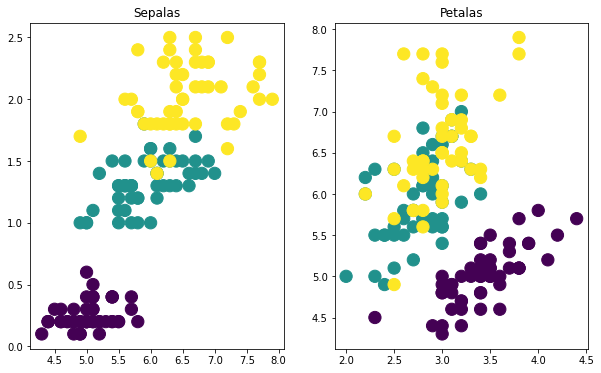

In [85]:
# visualizando
%matplotlib inline
f,(ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
# sharey controla o compartilhamento de propriedades entre os eixos x ( sharex) ou y ( sharey)
# True ou 'all': o eixo x ou y será compartilhado entre todas as subparcelas
ax1.set_title('Sepalas')
ax1.scatter(X['sepal length (cm)'], X['petal width (cm)'],s=150,c=y)
ax2.set_title('Petalas')
ax2.scatter(X['sepal width (cm)'], X['sepal length (cm)'],s=150,c=y);
plt.show()

**Dividindo os dados em `treino` e `teste`.**

O `random_state=12` serve para você replicar essa divisão e ter exatamente a mesma que eu tive nesse notebook.

A divisão é aleatória, mas você terá o mesmo nível de aleatoriedade.

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

**Pipelines**

Em nosso artigo sobre [pré-processamento de dados](https://github.com/danielamador12/public-projects/blob/master/pr%C3%A1tica_pre-processamento_e_metricas.ipynb) você poderá saber mais sobre esse método que serve para automatizar etapas do processo de Machine Learning.

In [86]:
# criando pipelines

pip_ss_knn = Pipeline([('scaler', StandardScaler()),
                    ('KNN', KNeighborsClassifier())
                   ])

pip_minmax_knn = Pipeline([('minmax', MinMaxScaler()),
                       ('KNN', KNeighborsClassifier())
                      ])
pip_knn=Pipeline([('KNN', KNeighborsClassifier())
                      ])



pip_ss_svm = Pipeline([('scaler', StandardScaler()),
                       ('SVM', svm.SVC())
                      ])
pip_minmax_svm = Pipeline([('minmax', MinMaxScaler()),
                       ('SVM', svm.SVC())
                      ])
pip_svm=Pipeline([('SVM', KNeighborsClassifier())
                      ])



pip_ss_random = Pipeline([('scaler', StandardScaler()),
                       ('Random', RandomForestClassifier())
                      ])
pip_minmax_random = Pipeline([('minmax', MinMaxScaler()),
                       ('Random', RandomForestClassifier())
                      ])
pip_random=Pipeline([('Random', RandomForestClassifier())
                      ])



pip_ss_tree = Pipeline([('scaler', StandardScaler()),
                       ('Tree', DecisionTreeClassifier())
                      ])
pip_minmax_tree= Pipeline([('minmax', MinMaxScaler()),
                       ('Tree', DecisionTreeClassifier())
                      ])
pip_tree=Pipeline([('Tree', DecisionTreeClassifier())
                      ])

# não funciona bem com os piplines, mas está aqui para visualizarmos
pip_ss_kmeans = Pipeline([('scaler', StandardScaler()),
                       ('KMeans', KMeans())
                      ])
pip_minmax_kmeans= Pipeline([('minmax', MinMaxScaler()),
                       ('KMeans', KMeans())
                      ])
pip_kmeans=Pipeline([('KMeans', KMeans())
                      ])


# 'pip_ss_nb' não é criado por o NB não aceitar valores negativos
pip_minmax_nb= Pipeline([('minmax', MinMaxScaler()),
                       ('Naive', MultinomialNB())
                      ])
pip_nb=Pipeline([('Naive', MultinomialNB())
                      ])

**Treinando os pipelines**

Vamos treinar com nossos dados de treino: `X_train` e `y_train`


In [16]:
pip_ss_knn.fit(X_train, y_train)

pip_minmax_knn.fit(X_train, y_train)

pip_knn.fit(X_train, y_train)



pip_ss_svm.fit(X_train, y_train)

pip_minmax_svm.fit(X_train, y_train)

pip_svm.fit(X_train, y_train)


pip_ss_random.fit(X_train, y_train)

pip_minmax_random.fit(X_train, y_train)

pip_random.fit(X_train, y_train)



pip_ss_tree.fit(X_train, y_train)

pip_minmax_tree.fit(X_train, y_train)

pip_tree.fit(X_train, y_train)



pip_ss_kmeans.fit(X_train, y_train)

pip_minmax_kmeans.fit(X_train, y_train)

pip_kmeans.fit(X_train, y_train)



pip_minmax_nb.fit(X_train, y_train)

pip_nb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('Naive',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

**Scores dos pipelines**

Aqui vamos ver os resultados de cada pipeline.

É interessante saber que, quanto maior a distância entre a predição com dados de treino e de teste, maior é o *enviesamento* do algoritmo.

In [17]:
pip_ss_knn.score(X_test, y_test),pip_ss_knn.score(X_train, y_train)

(0.9666666666666667, 0.9583333333333334)

In [18]:
pip_minmax_knn.score(X_test, y_test),pip_minmax_knn.score(X_train, y_train)

(1.0, 0.95)

In [19]:
pip_knn.score(X_test, y_test),pip_knn.score(X_train, y_train)

(0.9666666666666667, 0.975)

In [20]:
pip_ss_svm.score(X_test, y_test),pip_ss_svm.score(X_train, y_train)

(0.9666666666666667, 0.975)

In [21]:
pip_minmax_svm.score(X_test, y_test),pip_minmax_svm.score(X_train, y_train)

(0.9666666666666667, 0.975)

In [22]:
pip_svm.score(X_test, y_test),pip_svm.score(X_train, y_train)

(0.9666666666666667, 0.975)

In [23]:
pip_ss_random.score(X_test, y_test),pip_ss_random.score(X_train, y_train)

(0.9333333333333333, 1.0)

In [24]:
pip_minmax_random.score(X_test, y_test),pip_minmax_random.score(X_train, y_train)

(0.9666666666666667, 1.0)

In [25]:
pip_random.score(X_test, y_test),pip_random.score(X_train, y_train)

(0.9666666666666667, 1.0)

In [26]:
pip_ss_tree.score(X_test, y_test),pip_ss_tree.score(X_train, y_train)

(0.9666666666666667, 1.0)

In [27]:
pip_minmax_tree.score(X_test, y_test),pip_minmax_tree.score(X_train, y_train)

(0.9666666666666667, 1.0)

In [28]:
pip_tree.score(X_test, y_test),pip_tree.score(X_train, y_train)

(0.9666666666666667, 1.0)

In [29]:
pip_ss_kmeans.score(X_test, y_test),pip_ss_kmeans.score(X_train, y_train)

(-15.314114929960763, -48.03806210033841)

In [30]:
pip_minmax_kmeans.score(X_test, y_test),pip_minmax_kmeans.score(X_train, y_train)

(-0.75441541246347, -2.4653407158350746)

In [31]:
pip_kmeans.score(X_test, y_test),pip_kmeans.score(X_train, y_train)

(-7.231889174644799, -23.404577989090328)

In [32]:
pip_minmax_nb.score(X_test, y_test),pip_minmax_nb.score(X_train, y_train)

(0.8333333333333334, 0.7833333333333333)

In [33]:
pip_nb.score(X_test, y_test),pip_nb.score(X_train, y_train)

(0.9666666666666667, 0.95)

O algoritmo **K Nearest Neighbors (KNN)** foi escolhido por sua simplicidade, rápida execução e por se tratar de uma base de dados pequena com poucos dados e atributos.


Pensando na estratégia de resolver o problema proposto da melhor maneira e da forma mais simples possível, o algoritmo escolhido neste cenário apresentou bons resultados, sem a necessidade de tuning e ajustes.


Contudo, é dever do Cientista de Dados extrar do algoritmo o seu melhor para retornar o melhor resultado possível, por isso vamos fazer o *tuning* logo abaixo.


**Instanciando o algoritmo KNN.**

In [34]:
clf_knn = KNeighborsClassifier()

**Treinando o modelo utilizando a validação utilizando Cross Validation e armazenando os resultados.**

In [35]:
resultados_knn = cross_val_predict(clf_knn, X, y, cv=5)

**Verificando os resultados através de métricas.**

Se tivesse sido alterado o nome poderia ser retornado com:

`nomes_classes = label.inverse_transform([0,1,2])`

In [36]:
nome_classes = iris['class'].map({0: 'Setosa', 1:'Versicolor',2: 'Virginica'})

In [37]:
print(classification_report(y,resultados_knn,target_names=nome_classes.unique()))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        50
  Versicolor       0.98      0.94      0.96        50
   Virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



**Tuning**

In [38]:
# n_neighbors - número de vizinhos
lista_k=[1,2,3,4,5,6,7,8,9,10]
# p - parâmetro para minkowski (l1,l2,l_p)
lista_p=[1,2,3]

In [39]:
parametros_grid_knn = dict(n_neighbors=lista_k,p=lista_p)

In [40]:
parametros_grid_knn

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3]}

In [41]:
grid_knn=GridSearchCV(clf_knn , parametros_grid_knn, cv=10, scoring='accuracy')

In [42]:
grid_knn.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [43]:
grid_knn.cv_results_

{'mean_fit_time': array([0.00239227, 0.00187676, 0.00196335, 0.00190806, 0.00211592,
        0.00232654, 0.00195887, 0.00186372, 0.00187323, 0.00185416,
        0.00188968, 0.00189164, 0.00194707, 0.00195055, 0.00196238,
        0.00192721, 0.00192676, 0.00194542, 0.0018867 , 0.00202138,
        0.00200717, 0.00196879, 0.002004  , 0.00192745, 0.00190313,
        0.00198128, 0.00202806, 0.00231438, 0.00203869, 0.00197995]),
 'mean_score_time': array([0.00249653, 0.00197053, 0.00214288, 0.00196452, 0.0021523 ,
        0.00245848, 0.00197263, 0.00192082, 0.00216143, 0.00191205,
        0.00192606, 0.0022059 , 0.0019485 , 0.00201807, 0.0023339 ,
        0.00191922, 0.00200336, 0.00227797, 0.0019594 , 0.00201595,
        0.00237982, 0.00198941, 0.00198185, 0.00227714, 0.00194061,
        0.00206451, 0.00240326, 0.00239558, 0.00213189, 0.00231674]),
 'mean_test_score': array([0.96      , 0.96      , 0.96      , 0.94      , 0.95333333,
        0.96      , 0.96      , 0.96666667, 0.96666667, 0

In [44]:
grid_knn.best_params_

{'n_neighbors': 6, 'p': 3}

In [45]:
grid_knn.best_score_

0.9800000000000001

**Standard Scaler**

In [46]:
scaler = StandardScaler()

In [47]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [48]:
scaled=scaler.transform(X)
scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [49]:
clf_knn2 = KNeighborsClassifier()

In [50]:
resultados_knn = cross_val_predict(clf_knn2, scaled, y, cv=5)

In [51]:
nome_classes = iris['class'].map({0: 'Setosa', 1:'Versicolor',2: 'Virginica'})

In [52]:
print(classification_report(y,resultados_knn,target_names=nome_classes.unique()))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        50
  Versicolor       0.94      0.94      0.94        50
   Virginica       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



**Tuning com dados escalados**

In [53]:
parametros_grid_knn

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3]}

In [54]:
grid_knn2=GridSearchCV(clf_knn2 , parametros_grid_knn, cv=10, scoring='accuracy')

In [55]:
grid_knn2.fit(scaled,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [56]:
grid_knn2.cv_results_

{'mean_fit_time': array([0.00151668, 0.00111289, 0.00108099, 0.00090568, 0.00099568,
        0.0009203 , 0.00094521, 0.0016392 , 0.00091903, 0.00086122,
        0.00087013, 0.00084026, 0.000841  , 0.00082977, 0.00098646,
        0.000826  , 0.00085485, 0.00088015, 0.00085218, 0.00086703,
        0.00087748, 0.00080581, 0.00083883, 0.00104716, 0.00098343,
        0.00085611, 0.00081537, 0.00078642, 0.00087819, 0.00086546]),
 'mean_score_time': array([0.00251629, 0.00172276, 0.00181701, 0.00142524, 0.00165606,
        0.00166125, 0.00150163, 0.00232687, 0.0017431 , 0.00139482,
        0.00142658, 0.00162964, 0.00143166, 0.00140681, 0.00172167,
        0.001336  , 0.00137086, 0.00169933, 0.00141137, 0.00139544,
        0.00173004, 0.00132258, 0.00157275, 0.00201814, 0.00141475,
        0.00139768, 0.00167599, 0.00130544, 0.00742221, 0.0017899 ]),
 'mean_test_score': array([0.93333333, 0.95333333, 0.94666667, 0.93333333, 0.95333333,
        0.94666667, 0.95333333, 0.95333333, 0.94666667, 0

In [57]:
grid_knn2.best_params_

{'n_neighbors': 8, 'p': 2}

In [58]:
grid_knn2.best_score_

0.9666666666666668

**Naive Bayes**

In [59]:
naive=MultinomialNB()

In [60]:
resultados_naive = cross_val_predict(naive,X, y, cv=5)

In [61]:
nome_classes = iris['class'].map({0: 'Setosa', 1:'Versicolor',2: 'Virginica'})

In [62]:
print(classification_report(y,resultados_naive,target_names=nome_classes.unique()))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        50
  Versicolor       0.94      0.92      0.93        50
   Virginica       0.92      0.94      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [63]:
# alpha
lista_alpha=list(range(1,11))

In [64]:
parametros_grid_naive = dict(alpha=lista_alpha)

In [65]:
parametros_grid_naive

{'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [66]:
grid_naive=GridSearchCV(naive, parametros_grid_naive, cv=10, scoring='accuracy')

In [67]:
grid_naive.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [68]:
grid_naive.cv_results_

{'mean_fit_time': array([0.00427458, 0.002321  , 0.00294306, 0.00347135, 0.00228207,
        0.00215311, 0.00213084, 0.00216169, 0.00217805, 0.00213921]),
 'mean_score_time': array([0.00165763, 0.00091784, 0.00132694, 0.00127592, 0.00093606,
        0.00091147, 0.00091453, 0.00090554, 0.00090775, 0.00091612]),
 'mean_test_score': array([0.95333333, 0.95333333, 0.95333333, 0.96      , 0.96      ,
        0.96666667, 0.96      , 0.96666667, 0.96666667, 0.96666667]),
 'param_alpha': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 1},
  {'alpha': 2},
  {'alpha': 3},
  {'alpha': 4},
  {'alpha': 5},
  {'alpha': 6},
  {'alpha': 7},
  {'alpha': 8},
  {'alpha': 9},
  {'alpha': 10}],
 'rank_test_score': array([8, 8, 8, 5, 5, 1, 7, 1, 1, 1], dtype=int32),
 'split0_test_score': array([1., 1., 1., 1., 1., 1., 1., 

In [69]:
grid_naive.best_params_

{'alpha': 6}

In [70]:
grid_naive.best_score_

0.9666666666666668

**KNN com {'n_neighbors': 6, 'p': 3}**

In [71]:
display(X_train.head(3)),display(X_test.head(3))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
17,5.1,3.5,1.4,0.3
81,5.5,2.4,3.7,1.0
103,6.3,2.9,5.6,1.8


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
40,5.0,3.5,1.3,0.3
146,6.3,2.5,5.0,1.9
38,4.4,3.0,1.3,0.2


(None, None)

In [72]:
display(y_train.head(3)),display(y_test.head(3))

17     0
81     1
103    2
Name: class, dtype: int64

40     0
146    2
38     0
Name: class, dtype: int64

(None, None)

In [73]:
knn_final=KNeighborsClassifier(n_neighbors=6, p=3)

In [74]:
knn_final.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=3,
                     weights='uniform')

In [75]:
y_pred=knn_final.predict(X_test)

In [76]:
# acuracia
accuracy_score(y_test,y_pred)

1.0

In [77]:
# relatorio
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [78]:
y_pred2=knn_final.predict(X_train)

In [79]:
# acuracia
accuracy_score(y_train,y_pred2)

0.9833333333333333

In [80]:
# relatorio
print (classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.98      0.98      0.98        41
           2       0.98      0.98      0.98        41

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

